## Final Project Submission

Please fill out:
* Student name: KIGO VALERIE WAMWITHA
* Student pace: Full Time(HYBRID)
* Scheduled project review date/time: 05/07/2025
* Instructor name: FAITH ROTICH
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## New_Movie_Sudio_Project - Final Project
The company views Original Video Content as something they can join and venture in. As a data scientist, the prospect is to translate the findings of which movies they should put in their New Movie Studio. Also, find actionable insights that they can use and give recommendations.
### Objectives
* To find the type of movies the company should create.
* To yield 3 concrete business recommendations that the business should take.
* To describe the project goals,data,methods and results to shareholders.

  
Will be able to deal with;

* Missing values in data
* How to aggregate data
* How to visualize and make data easily accessible

Use f 1025 Rws and 17 Columns for the analysis, which included variables about:
* Revenue - domestic_gross, foreign_gross,worldwide_gross and production_budget
* Data - Primary_title, studio,release_date,genres
* performance_measure- averagerating, numvotes
* Personnel - primary_name,primary_profession

#### Task: Analyze the type of films the company should create.

## Business Understanding
### What is the relationship between potential movie types and audience reviews or movie types that did well?
### What type of movie will meet the needs of the company?
Intuitively it may be assumed that a mvies with low reviews or low rates is considered not reliable.

In this analysis we are going to look into IMDB and Bom movies dataset that will help in determining which movie type will be the best to use.

In [1]:
import numpy as np
import pandas as pd 
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding
The data source for this analysis will be from;
### 'AviationData.csv'
* *Sources* : The data was retrieved from Kaggle
*  *Contents* : Data about the potential risk of each flight. Contains; model numbers, fatal injuries and the accidents occured.
*  *Format* : It is a csv data
## TASK
* Check missing values
* Aggregate Data
## Use of
* df.unique(): to check if there are unique values and also replacing the unique values using nan.
* df.head(): show first rows of a dataframe.
* df.shape: to know the size of the data set.
* df.isnull(): to check for null values.
* df.dropna(): to drop subsets of null values.


In [2]:
df_bom = pd.read_csv('bom.movie_gross.csv')
df_bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
df_bom.describe().tail(10)

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [5]:
df_bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
df_bom[df_bom['foreign_gross'].isnull()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010


In [7]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].fillna(0)

In [8]:
df_bom['domestic_gross'] = df_bom['domestic_gross'].fillna(0)

In [9]:

df_bom['studio'] = df_bom['studio'].fillna(0)

In [10]:
df_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [11]:
df_bom.duplicated().sum()

0

In [12]:
df_bom.nunique()

title             3386
studio             258
domestic_gross    1798
foreign_gross     1205
year                 9
dtype: int64

In [13]:
df_bom.shape

(3387, 5)

#### From the data set above, it is clear that the bom_movie_gross dataset has null values in domestic and foreign gross, also, in studio. This is cleaned by filling (0) on the missing values. The data set has a total of 3,387rows and 5 columns. 

## Cleaning The Numbers Movie Budgets Data

In [14]:
df_budget= pd.read_csv('tn.movie_budgets.csv')
df_budget.head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [15]:
df_budget.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5772,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584"
5773,74,"Feb 26, 1993",El Mariachi,"$7,000","$2,040,920","$2,041,928"
5774,75,"Oct 8, 2004",Primer,"$7,000","$424,760","$841,926"
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [16]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [17]:
df_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [18]:
df_budget.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [19]:
df_budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [20]:
df_budget.duplicated().sum()

0

In [21]:
df_budget.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [22]:
df_budget.shape

(5782, 6)

In [23]:
df_budget['release_date']=pd.to_datetime(df_budget['release_date'])

In [24]:
df_budget.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
dtype: object

From the above, it is clear that The Numbers Movie budget dataset has no null values, no duplicates, a total of 5,782 rows, and 6 columns. The columns for the 'Release date' should be in a Date Time Format.

## Merging the tw data sets

In [25]:
df_bom.rename(columns = {'title':'movie'}, inplace= True)
df_bom.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [26]:
merged = pd.merge(df_bom,df_budget, on= 'movie', how='inner')
merged

,movie,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,2010-06-18,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,2010-07-16,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,2010-05-21,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,2010-06-30,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,2010-05-07,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,0,2018,64,2018-06-15,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,0,2018,95,2018-12-07,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,2018-02-02,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,0,2018,71,2018-09-14,"$6,000,000","$1,214,525","$1,427,656"


In [27]:
df_bom.rename(columns = {'year':'release_date'}, inplace= True)
df_bom.head()

,movie,studio,domestic_gross,foreign_gross,release_date
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [28]:
df_bom['release_date']=pd.to_numeric(df_bom['release_date'], errors='coerce')
df_budget['release_date']=pd.to_datetime(df_budget['release_date'], errors='coerce')
df_budget['release_date'] = df_budget['release_date'].dt.year
df_bom['release_date'] = df_bom['release_date'].astype('int64')
df_budget['release_date'] = df_budget['release_date'].astype('int64')
merged_1 = pd.merge(df_bom,df_budget, on= 'release_date', how='inner')
merged_1

,movie_x,studio,domestic_gross_x,foreign_gross,release_date,id,movie_y,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,15,Tangled,"$260,000,000","$200,821,936","$586,477,240"
1,Toy Story 3,BV,415000000.0,652000000,2010,39,Robin Hood,"$210,000,000","$105,487,148","$322,459,006"
2,Toy Story 3,BV,415000000.0,652000000,2010,47,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
3,Toy Story 3,BV,415000000.0,652000000,2010,51,Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4,Toy Story 3,BV,415000000.0,652000000,2010,58,Tron: Legacy,"$200,000,000","$172,062,763","$400,062,763"
...,...,...,...,...,...,...,...,...,...,...
814794,An Actor Prepares,Grav.,1700.0,0,2018,77,Blood Feast,"$1,200,000","$8,708","$8,708"
814795,An Actor Prepares,Grav.,1700.0,0,2018,29,Unfriended: Dark Web,"$1,000,000","$8,866,745","$16,434,588"
814796,An Actor Prepares,Grav.,1700.0,0,2018,1,That Way Madness Lies,"$650,000","$1,447","$1,447"
814797,An Actor Prepares,Grav.,1700.0,0,2018,67,Higher Power,"$500,000",$528,$528


In [29]:
merged_2= pd.merge(df_bom,df_budget, on=['movie', 'release_date'], how='inner')
merged_2

,movie,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...
1210,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100"
1211,Ben is Back,RAtt.,3700000.0,0,2018,95,"$13,000,000","$3,703,182","$9,633,111"
1212,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"$30,000,000","$490,973","$648,599"
1213,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656"


## Im.db Data Cleaning

In [30]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [31]:
df_IMDB_table =pd.read_sql ("""
        SELECT name
        FROM Sqlite_master
        WHERE type = 'table';
""",conn)
df_IMDB_table

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [32]:
df_basics =pd.read_sql ("""
         SELECT *
         FROM movie_basics;
""",conn)
df_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [33]:
df_basics.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [34]:
df_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [35]:
df_basics.dropna(subset = ['runtime_minutes'], inplace= True)
df_basics.isnull().sum()

movie_id              0
primary_title         0
original_title        4
start_year            0
runtime_minutes       0
genres             2172
dtype: int64

In [36]:
df_basics['genres']= df_basics['genres'].fillna('None')
df_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     4
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [37]:
df_basics['original_title']= df_basics['original_title'].fillna('None')
df_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [38]:
df_directors= pd.read_sql ("""
         SELECT *
         FROM directors;
""",conn)
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [39]:
df_directors.dtypes

movie_id     object
person_id    object
dtype: object

In [40]:
df_directors.isnull().sum()

movie_id     0
person_id    0
dtype: int64

In [41]:
df_directors.duplicated().sum()
print(f" Duplicate rows: {df_directors}")



 Duplicate rows:          movie_id   person_id
0       tt0285252   nm0899854
1       tt0462036   nm1940585
2       tt0835418   nm0151540
3       tt0835418   nm0151540
4       tt0878654   nm0089502
...           ...         ...
291169  tt8999974  nm10122357
291170  tt9001390   nm6711477
291171  tt9001494  nm10123242
291172  tt9001494  nm10123248
291173  tt9004986   nm4993825

[291174 rows x 2 columns]


In [42]:
df_directors.duplicated(subset=['movie_id', 'person_id'])

0         False
1         False
2         False
3          True
4         False
          ...  
291169    False
291170    False
291171    False
291172    False
291173    False
Length: 291174, dtype: bool

In [43]:
df_directors.drop_duplicates(subset=['movie_id', 'person_id'])
df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [44]:
df_ratings = pd.read_sql ("""
         SELECT *
         FROM movie_ratings;
""",conn)
df_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [45]:
df_ratings.duplicated().sum()
print(f" Duplicate rows: {df_ratings}")

 Duplicate rows:          movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


In [46]:
df_persons = pd.read_sql ("""
         SELECT *
         FROM persons;
""",conn)
df_persons.isnull().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [47]:
df_persons.drop(columns = ['birth_year', 'death_year'], inplace= True)
df_persons

,person_id,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"
...,...,...,...
606643,nm9990381,Susan Grobes,actress
606644,nm9990690,Joo Yeon So,actress
606645,nm9991320,Madeline Smith,actress
606646,nm9991786,Michelle Modigliani,producer


In [48]:
merged_temp= pd.merge(df_basics,df_directors, on=['movie_id'], how='inner')
merged_temp

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411
...,...,...,...,...,...,...,...
238744,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",nm7308376
238745,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151
238746,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151
238747,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151


In [49]:
merged_3= pd.merge(merged_temp,df_ratings, on=['movie_id'], how='inner')
merged_3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43
...,...,...,...,...,...,...,...,...,...
163581,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,nm0812850,6.2,6
163582,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,nm0812850,6.2,6
163583,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",nm4394529,8.7,136
163584,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",nm4394529,8.7,136


In [50]:
merged_3.drop_duplicates(subset=['primary_title', 'original_title'])

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,6.9,4517
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,6.5,119
11,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",nm0365480,8.1,263
...,...,...,...,...,...,...,...,...,...
163575,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.0,"Crime,Documentary",nm10536332,6.1,7
163577,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,nm10536451,8.4,365
163580,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,nm1502645,6.2,5
163581,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,nm0812850,6.2,6


In [51]:
merged_4= pd.merge(merged_temp,df_persons, on=['person_id'], how='inner')
merged_4

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...
238742,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",nm7308376,Fraser Precious,"actor,producer,writer"
238743,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,Azhar Kinoi Lubis,director
238744,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,Azhar Kinoi Lubis,director
238745,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,nm8185151,Azhar Kinoi Lubis,director


In [52]:
merged_4.drop_duplicates(subset=['person_id', 'primary_name'])

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,"director,writer,actor"
5,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles,"actor,director,writer"
7,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0765384,Valeria Sarmiento,"editor,director,writer"
8,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,Raoul Ruiz,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...
238735,tt9915872,The Last White Witch,The Last White Witch,2019,97.0,"Comedy,Drama,Fantasy",nm8063415,Hideki Kiyota,"director,writer,editor"
238738,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama,nm5412267,Tamar Guimaraes,"director,writer,editor"
238741,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,nm10538274,Frank König,"director,cinematographer,editor"
238742,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",nm7308376,Fraser Precious,"actor,producer,writer"


In [53]:
df_basics.rename(columns = {'start_year':'release_date'}, inplace= True)
df_basics.head()

,movie_id,primary_title,original_title,release_date,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [54]:
merged_2.rename(columns={'movie': 'primary_title'}, inplace=True)

In [55]:
merged_dataset = pd.merge(merged_2,df_basics, on =['primary_title','release_date'], how='inner')
merged_dataset

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,Suspiria,152.0,"Fantasy,Horror,Mystery"
1043,The Hurricane Heist,ENTMP,6100000.0,0,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,The Hurricane Heist,103.0,"Action,Adventure,Crime"
1044,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,Destroyer,121.0,"Action,Crime,Drama"
1045,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama"


In [56]:
merged_dataset1=pd.merge(merged_dataset,df_ratings, on =['movie_id'], how='inner')
merged_dataset1

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,Shrek Forever After,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,The Twilight Saga: Eclipse,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,Iron Man 2,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,Suspiria,152.0,"Fantasy,Horror,Mystery",6.8,37360
1036,The Hurricane Heist,ENTMP,6100000.0,0,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,The Hurricane Heist,103.0,"Action,Adventure,Crime",5.1,15326
1037,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,Destroyer,121.0,"Action,Crime,Drama",6.2,13683
1038,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358


In [57]:
merged_dataset2=pd.merge(merged_dataset1,df_directors, on =['movie_id'], how='left')
merged_dataset2

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,person_id
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279
1,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279
2,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279
3,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279
4,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305
3432,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305
3433,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,nm0181903
3434,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,nm0181903


In [58]:
merged_dataset3=pd.merge(merged_dataset2,df_persons, on =['person_id'], how='left')
merged_dataset3

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,original_title,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
2,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
3,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,Toy Story 3,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
4,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,Inception,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan,"writer,producer,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"
3432,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,Gotti,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"
3433,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,nm0181903,Panos Cosmatos,"writer,director,producer"
3434,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656",tt6998518,Mandy,121.0,"Action,Fantasy,Horror",6.6,44378,nm0181903,Panos Cosmatos,"writer,director,producer"


In [59]:
final= merged_dataset3.drop(columns=['original_title'], errors= 'ignore')
final


,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
1,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
2,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
3,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
4,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan,"writer,producer,director"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3431,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"
3432,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"
3433,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656",tt6998518,121.0,"Action,Fantasy,Horror",6.6,44378,nm0181903,Panos Cosmatos,"writer,director,producer"
3434,Mandy,RLJ,1200000.0,0,2018,71,"$6,000,000","$1,214,525","$1,427,656",tt6998518,121.0,"Action,Fantasy,Horror",6.6,44378,nm0181903,Panos Cosmatos,"writer,director,producer"


In [60]:
final=final.drop_duplicates(subset=['primary_title', 'release_date'])
final

,primary_title,studio,domestic_gross_x,foreign_gross,release_date,id,production_budget,domestic_gross_y,worldwide_gross,movie_id,runtime_minutes,genres,averagerating,numvotes,person_id,primary_name,primary_profession
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"$200,000,000","$415,004,880","$1,068,879,522",tt0435761,103.0,"Adventure,Animation,Comedy",8.3,682218,nm0881279,Lee Unkrich,"editorial_department,editor,miscellaneous"
4,Inception,WB,292600000.0,535700000,2010,38,"$160,000,000","$292,576,195","$835,524,642",tt1375666,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,nm0634240,Christopher Nolan,"writer,producer,director"
5,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"$165,000,000","$238,736,787","$756,244,673",tt0892791,93.0,"Adventure,Animation,Comedy",6.3,167532,nm0593610,Mike Mitchell,"actor,director,writer"
15,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"$68,000,000","$300,531,751","$706,102,828",tt1325004,124.0,"Adventure,Drama,Fantasy",5.0,211733,nm1720541,David Slade,"producer,director,writer"
17,Iron Man 2,Par.,312400000.0,311500000,2010,15,"$170,000,000","$312,433,331","$621,156,389",tt1228705,124.0,"Action,Adventure,Sci-Fi",7.0,657690,nm0269463,Jon Favreau,"producer,actor,miscellaneous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3422,Suspiria,Amazon,2500000.0,5400000,2018,81,"$20,000,000","$2,483,472","$7,034,615",tt1034415,152.0,"Fantasy,Horror,Mystery",6.8,37360,nm0345174,Luca Guadagnino,"director,producer,writer"
3425,The Hurricane Heist,ENTMP,6100000.0,0,2018,22,"$40,000,000","$6,115,824","$30,963,684",tt5360952,103.0,"Action,Adventure,Crime",5.1,15326,nm0003418,Rob Cohen,"producer,director,actor"
3429,Destroyer,Annapurna,1500000.0,4000000,2018,5,"$9,000,000","$1,533,324","$3,681,096",tt7137380,121.0,"Action,Crime,Drama",6.2,13683,nm0476201,Karyn Kusama,"director,writer,producer"
3431,Gotti,VE,4300000.0,0,2018,64,"$10,000,000","$4,286,367","$6,089,100",tt1801552,112.0,"Biography,Crime,Drama",4.8,10358,nm0175305,Kevin Connolly,"actor,director,producer"


In [61]:
final=final.copy()

# EDA

In [80]:
Top_rated = final[['primary_title', 'averagerating','numvotes']].dropna().sort_values(by='numvotes', ascending=False)
Top_rated.head(10)

,primary_title,averagerating,numvotes
4,Inception,8.8,1841066
837,The Dark Knight Rises,8.4,1387769
1819,Interstellar,8.6,1299334
908,Django Unchained,8.4,1211405
1244,The Wolf of Wall Street,8.2,1035358
66,Shutter Island,8.1,1005960
1767,Guardians of the Galaxy,8.1,948394
2508,Deadpool,8.0,820847
881,The Hunger Games,7.2,795227
2175,Mad Max: Fury Road,8.1,780910


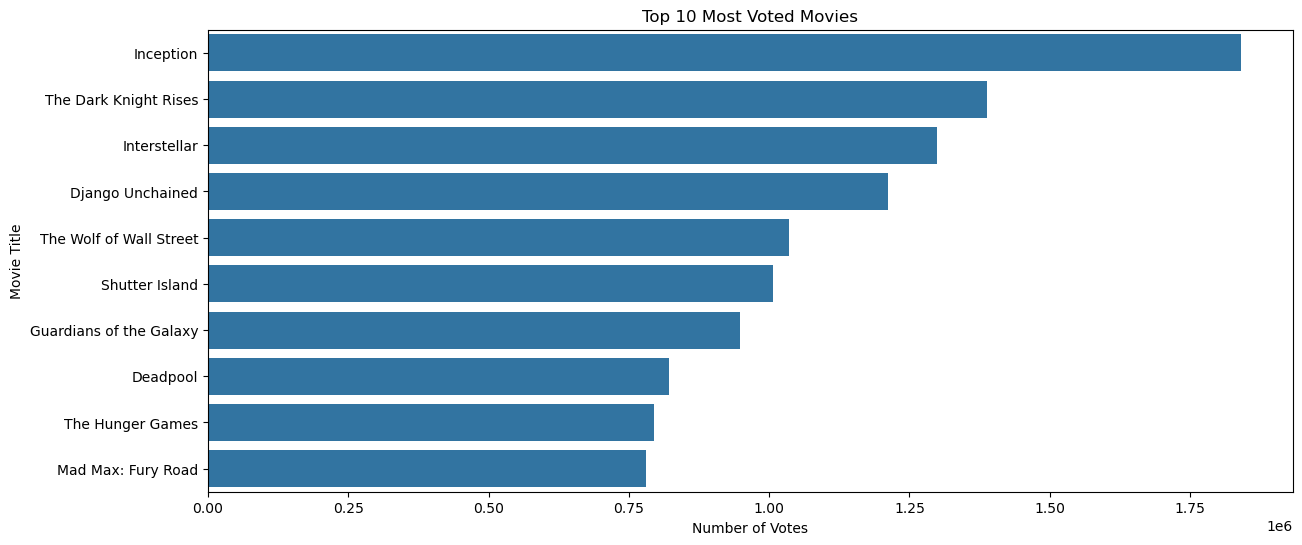

In [87]:
plt.figure(figsize= (14,6))
Top_10= Top_rated.sort_values(by='numvotes', ascending = False). head(10)
sns.barplot (data =Top_10, x='numvotes', y= 'primary_title')
plt.xlabel('Number of Votes')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Voted Movies')
plt.show()

In [73]:
# Creating a copy of the columns to use
final_subset = final[['primary_title', 'genres','worldwide_gross']].copy()
# clean the currency in the worldwide_gross by removing $ and  ''.
final_subset['worldwide_gross'] = final_subset['worldwide_gross'].replace(r'[\$,]', '', regex=True)
#convert to numeric
final_subset['worldwide_gross'] = pd.to_numeric(final_subset['worldwide_gross'],errors= 'coerce')
# Group and sort values using worldwide_gross
Top_movies =final_subset.groupby(['primary_title', 'genres'])['worldwide_gross'].sum().reset_index()
Top_movies= Top_movies.sort_values(by= 'worldwide_gross', ascending= False)
Top_movies.head(10)

,primary_title,genres,worldwide_gross
85,Avengers: Infinity War,"Action,Adventure,Sci-Fi",2048134200
387,Jurassic World,"Action,Adventure,Sci-Fi",1648854864
271,Furious 7,"Action,Crime,Thriller",1518722794
84,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",1403013963
111,Black Panther,"Action,Adventure,Sci-Fi",1348258224
388,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",1305772799
268,Frozen,"Adventure,Animation,Comedy",1272469910
348,Incredibles 2,"Action,Adventure,Animation",1242520711
775,The Fate of the Furious,"Action,Crime,Thriller",1234846267
360,Iron Man 3,"Action,Adventure,Sci-Fi",1215392272


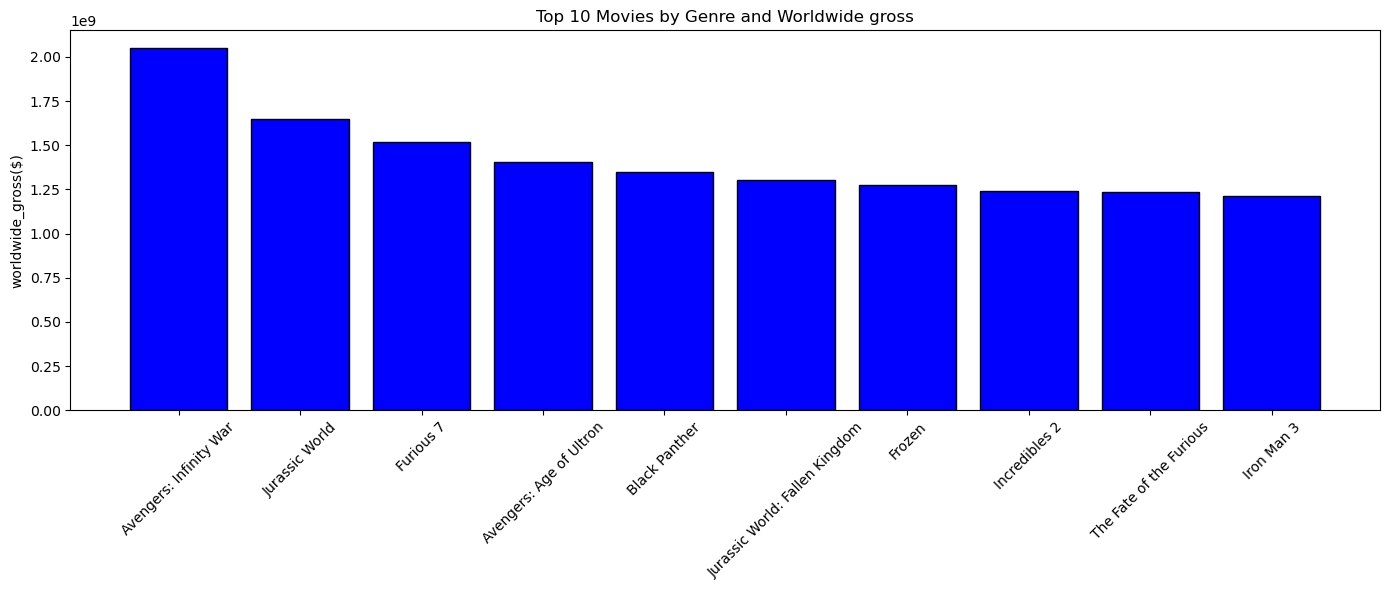

In [102]:
Top_movies= Top_movies.head(10)

bar = np.arange(len(Top_movies))
width= 0.3
gross= Top_movies['worldwide_gross']
title= Top_movies['primary_title']
plt.figure(figsize=(14,6))
plt.bar(bar, gross, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Genre and Worldwide gross')
plt.ylabel('worldwide_gross($)')
plt.xticks(bar,labels= title, rotation=45,)
plt.tight_layout()
plt.show()

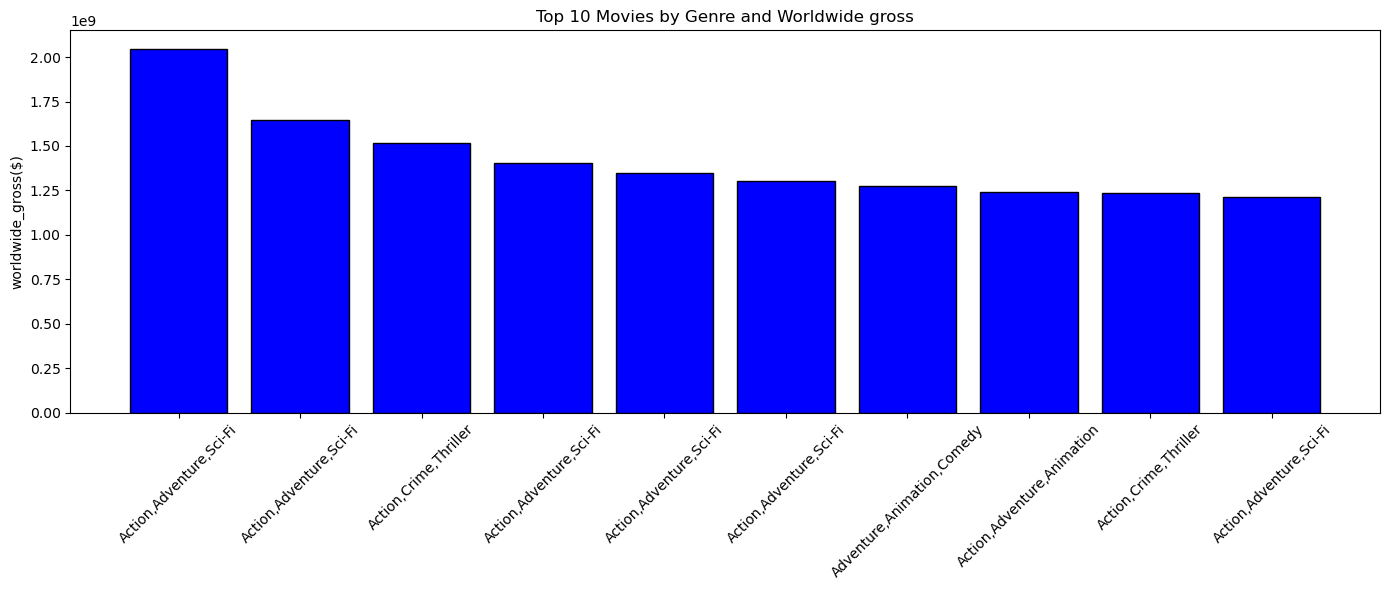

In [103]:
Top_movies= Top_movies.head(10)

bar = np.arange(len(Top_movies))
width= 0.3
gross= Top_movies['worldwide_gross']
genre= Top_movies['genres']
plt.figure(figsize=(14,6))
plt.bar(bar, gross, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Genre and Worldwide gross')
plt.ylabel('worldwide_gross($)')
plt.xticks(bar,labels= genre, rotation=45,)
plt.tight_layout()
plt.show()

In [105]:
# Creating a copy of the columns to use
final_subset = final[['primary_title', 'genres','production_budget']].copy()
# clean the currency in the production_budget by removing $ and ''.
final_subset['production_budget'] = final_subset['production_budget'].replace(r'[\$,]', '', regex=True)
# change to numeric
final_subset['production_budget'] = pd.to_numeric(final_subset['production_budget'],errors= 'coerce')
# Group and sort values by production_budget
Top_budget =final_subset.groupby(['primary_title', 'genres'])['production_budget'].sum().reset_index()
Top_budget= Top_budget.sort_values(by= 'production_budget', ascending= False)

Top_budget.head(10)

,primary_title,genres,production_budget
562,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000
84,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000
667,Spectre,"Action,Adventure,Thriller",300000000
85,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000
391,Justice League,"Action,Adventure,Fantasy",300000000
751,The Dark Knight Rises,"Action,Thriller",275000000
660,Solo: A Star Wars Story,"Action,Adventure,Fantasy",275000000
837,The Lone Ranger,"Action,Adventure,Western",275000000
377,John Carter,"Action,Adventure,Sci-Fi",275000000
696,Tangled,"Adventure,Animation,Comedy",260000000


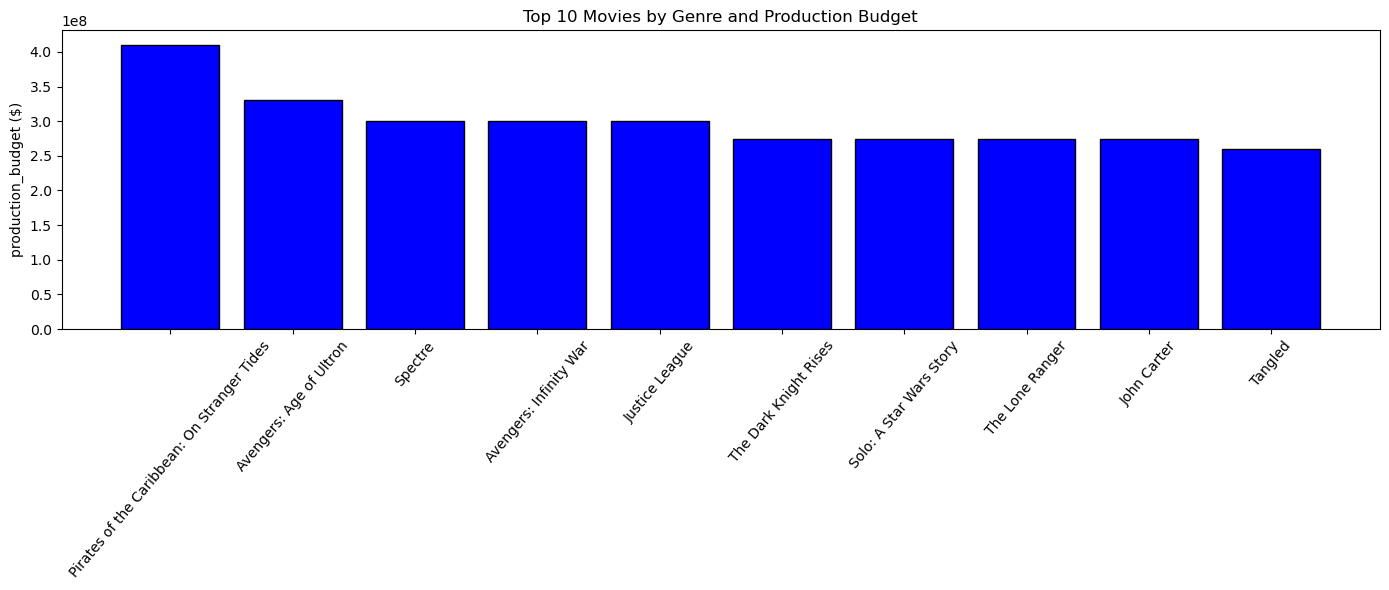

In [112]:
Top_budget= Top_budget.head(10)

bar = np.arange(len(Top_budget))
width= 0.3
production= Top_budget['production_budget']
title= Top_budget['primary_title']
plt.figure(figsize=(14,6))
plt.bar(bar, production, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Genre and Production Budget')
plt.ylabel('production_budget ($)')
plt.xticks(bar,labels= title, rotation=50,)
plt.tight_layout()
plt.show()

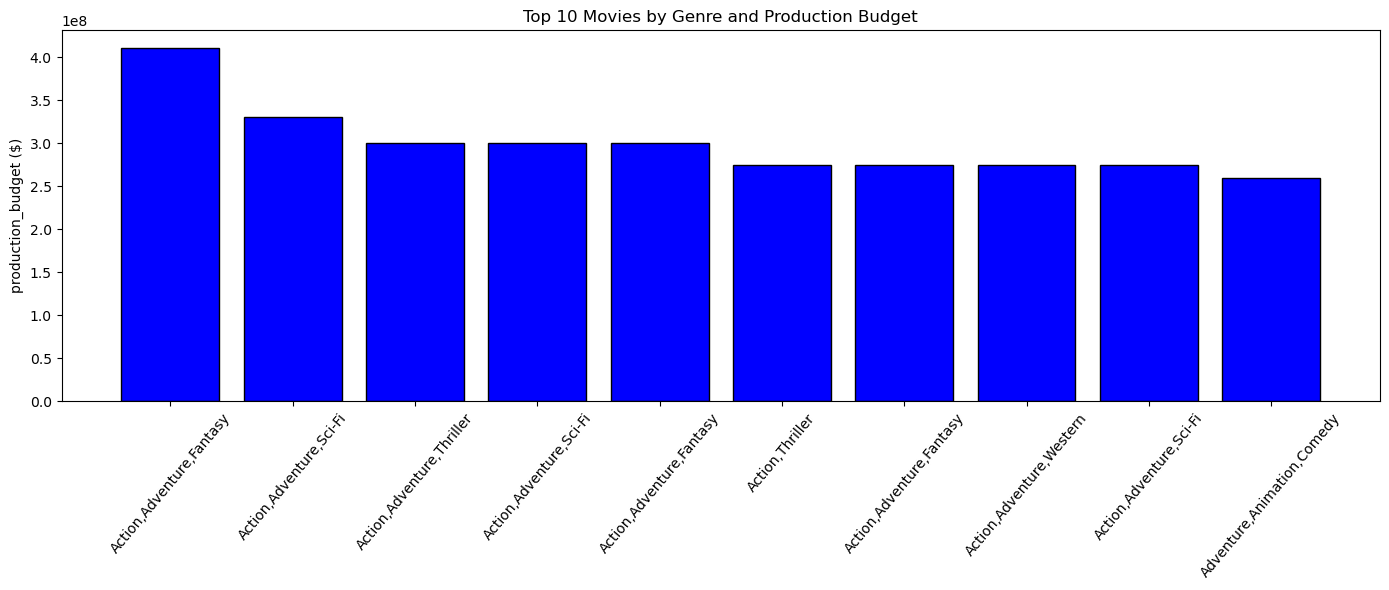

In [113]:
Top_budget= Top_budget.head(10)

bar = np.arange(len(Top_budget))
width= 0.3
production= Top_budget['production_budget']
genre= Top_budget['genres']
plt.figure(figsize=(14,6))
plt.bar(bar, production, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Genre and Production Budget')
plt.ylabel('production_budget ($)')
plt.xticks(bar,labels= genre, rotation=50,)
plt.tight_layout()
plt.show()

In [118]:
# Creating a copy of the columns to use
final_subset = final[['primary_title', 'genres','foreign_gross', 'domestic_gross_y']].copy()
# clean the currency in the foreign_gross by removing $ and ''.
final_subset['domestic_gross_y'] = final_subset['domestic_gross_y'].replace(r'[\$,]', '', regex=True)
final_subset['foreign_gross'] = final_subset['foreign_gross'].replace(r'[\$,]', '', regex=True)
# convert to numeric
final_subset['domestic_gross_y'] = pd.to_numeric(final_subset['domestic_gross_y'],errors= 'coerce')
final_subset['foreign_gross'] = pd.to_numeric(final_subset['foreign_gross'],errors= 'coerce')
# Group and sort values by Production_budget
Top_foreign=final_subset.groupby(['primary_title', 'genres'])[['foreign_gross', 'domestic_gross_y']].sum().reset_index()
Top_foreign=Top_foreign.sort_values(by= 'foreign_gross', ascending= False)
Top_foreign.head(10)

,primary_title,genres,foreign_gross,domestic_gross_y
84,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",946400000.0,459005868
388,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",891800000.0,417719760
268,Frozen,"Adventure,Animation,Comedy",875700000.0,400738009
945,Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",858600000.0,245439076
485,Minions,"Adventure,Animation,Comedy",823400000.0,336045770
76,Aquaman,"Action,Adventure,Fantasy",812700000.0,335061807
360,Iron Man 3,"Action,Adventure,Sci-Fi",805800000.0,408992272
562,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",804600000.0,241063875
649,Skyfall,"Action,Adventure,Thriller",804200000.0,304360277
946,Transformers: Dark of the Moon,"Action,Adventure,Sci-Fi",771400000.0,352390543


In [ ]:
Top_foreign=Top_foreign.head(10)

bar = np.arange(len(Top_budget))
width= 0.3
foreign= Top_foreign['foreign_gross']
title=Top_foreign['primary_title']
plt.figure(figsize=(14,6))
plt.bar(bar, foreign, color='blue', edgecolor='black')

plt.title('Top 10 Movies by Foreign Gross ')
plt.ylabel('foreign_gross ($)')
plt.xticks(bar,labels= tit, rotation=50,)
plt.tight_layout()
plt.show()

In [76]:
# creating a copy of the columns to use
final_subset = final[['production_budget','primary_title', 'genres','worldwide_gross']].copy()
# Clean the currency by removing the dollar signs and ''.
final_subset['worldwide_gross'] = final_subset['worldwide_gross'].replace(r'[\$,]', '', regex=True)
final_subset['production_budget'] = final_subset['production_budget'].replace(r'[\$,]', '', regex=True)
# change to numeric
final_subset['production_budget'] = pd.to_numeric(final_subset['production_budget'], errors='coerce')
final_subset['worldwide_gross'] = pd.to_numeric(final_subset['worldwide_gross'], errors='coerce')
# calculating the Return of Investment
final_subset['ROI'] = (final_subset['worldwide_gross'] - final_subset['production_budget']) / final_subset['production_budget']
#Sort by ROI 
Top_ROI = final_subset[['primary_title','genres','ROI']].sort_values(by='ROI', ascending=False)
Top_ROI.head(10)

,primary_title,genres,ROI
2346,The Gallows,"Horror,Mystery,Thriller",415.564740
1035,The Devil Inside,Horror,100.759490
111,Paranormal Activity 2,Horror,58.170677
3007,Get Out,"Horror,Mystery,Thriller",50.073590
1097,Chernobyl Diaries,"Horror,Mystery,Thriller",41.411721
551,Paranormal Activity 3,"Horror,Mystery,Thriller",40.407969
1907,Annabelle,"Horror,Mystery,Thriller",38.517372
203,The Last Exorcism,"Drama,Horror,Thriller",37.981056
2614,Dangal,"Action,Biography,Drama",30.016276
1368,The Purge,"Horror,Thriller",29.422194
